# **Project Name:- Fed-Ex Logistics Analysis**

## Project Summary
  

The primary goal of this project is to perform exploratory data analysis (EDA) on historical delivery records managed through FedEx under the Supply Chain Management System (SCMS). The objective is to uncover hidden patterns, Business insights, logistics cost , delivey performance and vendor performance from the SCMS data of the fedex.

## Business Objectives

From this Data we can generate some insightfull information about the:-


*   Delivery Performance
*   Geographical Insights wrt logistics Delay
*   Vendor Evaluation




## Importing Libraries & Dataset Loading

In [ ]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
## Dataset Loading
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')
data

Mounted at /content/drive


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


## Dataset First view

In [ ]:
## # data head
data.head()
#Data tail
data.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [ ]:
##Dataset Rows & Columns count
print("Columns are: ",data.columns)
print("Number of rows:" , data.shape[0])
print("Number of columns:" , data.shape[1])


Columns are:  Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')
Number of rows: 10324
Number of columns: 33


In [ ]:
## Dataset Information
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

## Understand Variables & Finding duplicates


In [ ]:
# Dataset Columns
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [ ]:
## Dataset types
print(data.dtypes)

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()
print("Duplicate rows:" , data.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Missing Values/Null Values Count
missing = data.isnull().sum()
missing = missing[missing > 0]
print(missing)

Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64


In [ ]:
## checking how many null values and types of data avilable in that column and their count
data['Shipment Mode'].value_counts(dropna=False)

,count
Shipment Mode,
Air,6113
Truck,2830
Air Charter,650
Ocean,371
NaN,360


In [ ]:
data['Dosage'].value_counts(dropna=False)

,count
Dosage,
NaN,1736
300mg,990
200mg,932
600mg,772
150/300mg,600
150/300/200mg,580
10mg/ml,552
150mg,431
200/50mg,395


## Data Wrangling

In [ ]:
## Convert One data types to another
print(data.dtypes)

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [ ]:
##The Date columns are in object format change it to datetime
data['PO Sent to Vendor Date'] = pd.to_datetime(data['PO Sent to Vendor Date'], errors = 'coerce')
data['PQ First Sent to Client Date'] = pd.to_datetime(data['PQ First Sent to Client Date'], errors = 'coerce')
data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'], errors = 'coerce')
data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'], errors = 'coerce')
data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'], errors = 'coerce')


/tmp/ipython-input-245507029.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['PO Sent to Vendor Date'] = pd.to_datetime(data['PO Sent to Vendor Date'], errors = 'coerce')
/tmp/ipython-input-245507029.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['PQ First Sent to Client Date'] = pd.to_datetime(data['PQ First Sent to Client Date'], errors = 'coerce')
/tmp/ipython-input-245507029.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'], errors = 'coerce')
/tmp/ipython-input-24550

In [ ]:
print(data.dtypes)

ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date                  object
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

In [ ]:
###clean object columns to bring it in proper format
object_col = data.select_dtypes(include='object').columns
## removing leading and trailing spaces in the column
data[object_col] = data[object_col].apply(lambda x: x.str.strip())
data[object_col]

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Delivery Recorded Date,...,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,2-Jun-06,...,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,Ranbaxy Fine Chemicals LTD,Yes,13,780.34
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,14-Nov-06,...,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,"Aurobindo Unit III, India",Yes,358,4521.5
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,27-Aug-06,...,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,1-Sep-06,...,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,11-Aug-06,...,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,"Aurobindo Unit III, India",Yes,7590,45450.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,20-Jul-15,...,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920)
10320,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,7-Aug-15,...,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921)
10321,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,3-Sep-15,...,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost
10322,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,11-Aug-15,...,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost


## New Usefull Columns

In [ ]:
## Lead time
data['Lead Time'] = data['PO Sent to Vendor Date'] - data['PQ First Sent to Client Date']
data['Lead Time']
filtered = data[data['Lead Time'].notna()]
print(filtered['Lead Time'])

2681    14 days
2682    12 days
2683    31 days
2684    49 days
2685    38 days
         ...   
6575    28 days
6576    18 days
6577    33 days
6578    20 days
6579   138 days
Name: Lead Time, Length: 3842, dtype: timedelta64[ns]


In [ ]:
## Delivery Duration
data['Delivery_duration'] = data['Delivered to Client Date'] - data['PO Sent to Vendor Date']
data['Delivery_duration']

,Delivery_duration
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT
...,...
10319,NaT
10320,NaT
10321,NaT
10322,NaT


In [ ]:
## Delay in deliveries
data['Delay'] = data['Delivered to Client Date'] - data['Scheduled Delivery Date']
data['Delay']

,Delay
0,0 days
1,0 days
2,0 days
3,0 days
4,0 days
...,...
10319,-16 days
10320,6 days
10321,-6 days
10322,-36 days


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   ID                            10324 non-null  int64          
 1   Project Code                  10324 non-null  object         
 2   PQ #                          10324 non-null  object         
 3   PO / SO #                     10324 non-null  object         
 4   ASN/DN #                      10324 non-null  object         
 5   Country                       10324 non-null  object         
 6   Managed By                    10324 non-null  object         
 7   Fulfill Via                   10324 non-null  object         
 8   Vendor INCO Term              10324 non-null  object         
 9   Shipment Mode                 9964 non-null   object         
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns] 
 11  PO Sent to Vend

In [ ]:
## conver weight and freight object to numeric
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   ID                            10324 non-null  int64          
 1   Project Code                  10324 non-null  object         
 2   PQ #                          10324 non-null  object         
 3   PO / SO #                     10324 non-null  object         
 4   ASN/DN #                      10324 non-null  object         
 5   Country                       10324 non-null  object         
 6   Managed By                    10324 non-null  object         
 7   Fulfill Via                   10324 non-null  object         
 8   Vendor INCO Term              10324 non-null  object         
 9   Shipment Mode                 9964 non-null   object         
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns] 
 11  PO Sent to Vend

In [ ]:
## Total units (units of mead=sure per pack * Line item quantity)
data['Total Units'] = data['Unit of Measure (Per Pack)'] * data['Line Item Quantity']
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Lead Time,Delivery_duration,Delay,Total Units
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,NaN,NaT,NaT,0 days,570
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,NaN,NaT,NaT,0 days,240000
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,NaN,NaT,NaT,0 days,50000
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,NaN,NaT,NaT,0 days,1915200
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,NaN,NaT,NaT,0 days,2280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,0.06,"Mylan, H-12 & H-13, India",No,NaN,NaN,705.79,NaT,NaT,-16 days,9994260
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,0.11,Hetero Unit III Hyderabad IN,No,NaN,NaN,161.71,NaT,NaT,6 days,1264320
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,NaN,NaN,5284.04,NaT,NaT,-6 days,15435780
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,0.11,Mylan (formerly Matrix) Nashik,Yes,1392.0,NaN,134.03,NaT,NaT,-36 days,1047900


In [ ]:
## Unit price from Line item Value
data['Calculated Unit Price'] = data['Line Item Value'] / data['Total Units']
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Lead Time,Delivery_duration,Delay,Total Units,Calculated Unit Price
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,NaN,NaT,NaT,0 days,570,0.966667
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,"Aurobindo Unit III, India",Yes,358.0,4521.50,NaN,NaT,NaT,0 days,240000,0.025833
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,NaN,NaT,NaT,0 days,50000,0.800000
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,NaN,NaT,NaT,0 days,1915200,0.066500
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,"Aurobindo Unit III, India",Yes,7590.0,45450.08,NaN,NaT,NaT,0 days,2280000,0.053333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,"Mylan, H-12 & H-13, India",No,NaN,NaN,705.79,NaT,NaT,-16 days,9994260,0.060000
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,Hetero Unit III Hyderabad IN,No,NaN,NaN,161.71,NaT,NaT,6 days,1264320,0.108667
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,Cipla Ltd A-42 MIDC Mahar. IN,No,NaN,NaN,5284.04,NaT,NaT,-6 days,15435780,0.333000
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,Mylan (formerly Matrix) Nashik,Yes,1392.0,NaN,134.03,NaT,NaT,-36 days,1047900,0.108667


In [ ]:
## difference bet the calculated unit price and unit price
data['Unit Price Difference'] = data['Calculated Unit Price'] - data['Unit Price']
data[['Unit Price', 'Calculated Unit Price', 'Unit Price Difference']]
data_sorted = data[['Unit Price', 'Calculated Unit Price', 'Unit Price Difference']].sort_values(by='Unit Price Difference', ascending=False)
data_sorted
## negligible difference

,Unit Price,Calculated Unit Price,Unit Price Difference
4749,1.16,1.165000,0.005000
2729,0.36,0.365000,0.005000
21,0.42,0.425000,0.005000
15,0.42,0.425000,0.005000
909,0.22,0.225000,0.005000
...,...,...,...
3815,0.64,0.634957,-0.005043
2857,0.64,0.634957,-0.005043
3422,0.64,0.634957,-0.005043
3589,0.52,0.514844,-0.005156


In [ ]:
## Freight pwe unit
data['Freight per Unit'] = data['Freight Cost (USD)'] / data['Total Units']
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Lead Time,Delivery_duration,Delay,Total Units,Calculated Unit Price,Unit Price Difference,Freight per Unit
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,13.0,780.34,NaN,NaT,NaT,0 days,570,0.966667,-0.003333,1.369018
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,358.0,4521.50,NaN,NaT,NaT,0 days,240000,0.025833,-0.004167,0.018840
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,171.0,1653.78,NaN,NaT,NaT,0 days,50000,0.800000,0.000000,0.033076
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1855.0,16007.06,NaN,NaT,NaT,0 days,1915200,0.066500,-0.003500,0.008358
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,7590.0,45450.08,NaN,NaT,NaT,0 days,2280000,0.053333,0.003333,0.019934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,NaN,NaN,705.79,NaT,NaT,-16 days,9994260,0.060000,0.000000,NaN
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,NaN,NaN,161.71,NaT,NaT,6 days,1264320,0.108667,-0.001333,NaN
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,NaN,NaN,5284.04,NaT,NaT,-6 days,15435780,0.333000,0.003000,NaN
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,1392.0,NaN,134.03,NaT,NaT,-36 days,1047900,0.108667,-0.001333,NaN


In [ ]:
## Insurance per unit
data['Insurance per Unit'] = data['Line Item Insurance (USD)'] / data['Total Units']
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Freight Cost (USD),Line Item Insurance (USD),Lead Time,Delivery_duration,Delay,Total Units,Calculated Unit Price,Unit Price Difference,Freight per Unit,Insurance per Unit
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,780.34,NaN,NaT,NaT,0 days,570,0.966667,-0.003333,1.369018,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,4521.50,NaN,NaT,NaT,0 days,240000,0.025833,-0.004167,0.018840,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,1653.78,NaN,NaT,NaT,0 days,50000,0.800000,0.000000,0.033076,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,16007.06,NaN,NaT,NaT,0 days,1915200,0.066500,-0.003500,0.008358,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,45450.08,NaN,NaT,NaT,0 days,2280000,0.053333,0.003333,0.019934,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,NaN,705.79,NaT,NaT,-16 days,9994260,0.060000,0.000000,NaN,0.000071
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,NaN,161.71,NaT,NaT,6 days,1264320,0.108667,-0.001333,NaN,0.000128
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,NaN,5284.04,NaT,NaT,-6 days,15435780,0.333000,0.003000,NaN,0.000342
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,NaN,134.03,NaT,NaT,-36 days,1047900,0.108667,-0.001333,NaN,0.000128


In [ ]:
## Total logistics cost per unit
data['Total Logistics Cost per Unit'] = data['Freight per Unit'] + data['Insurance per Unit']
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Insurance (USD),Lead Time,Delivery_duration,Delay,Total Units,Calculated Unit Price,Unit Price Difference,Freight per Unit,Insurance per Unit,Total Logistics Cost per Unit
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,NaN,NaT,NaT,0 days,570,0.966667,-0.003333,1.369018,NaN,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,NaN,NaT,NaT,0 days,240000,0.025833,-0.004167,0.018840,NaN,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,NaN,NaT,NaT,0 days,50000,0.800000,0.000000,0.033076,NaN,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,NaN,NaT,NaT,0 days,1915200,0.066500,-0.003500,0.008358,NaN,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,NaN,NaT,NaT,0 days,2280000,0.053333,0.003333,0.019934,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,705.79,NaT,NaT,-16 days,9994260,0.060000,0.000000,NaN,0.000071,NaN
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,161.71,NaT,NaT,6 days,1264320,0.108667,-0.001333,NaN,0.000128,NaN
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,5284.04,NaT,NaT,-6 days,15435780,0.333000,0.003000,NaN,0.000342,NaN
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,134.03,NaT,NaT,-36 days,1047900,0.108667,-0.001333,NaN,0.000128,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   ID                             10324 non-null  int64          
 1   Project Code                   10324 non-null  object         
 2   PQ #                           10324 non-null  object         
 3   PO / SO #                      10324 non-null  object         
 4   ASN/DN #                       10324 non-null  object         
 5   Country                        10324 non-null  object         
 6   Managed By                     10324 non-null  object         
 7   Fulfill Via                    10324 non-null  object         
 8   Vendor INCO Term               10324 non-null  object         
 9   Shipment Mode                  9964 non-null   object         
 10  PQ First Sent to Client Date   7643 non-null   datetime64[ns] 
 11  PO

In [ ]:
## How much total value spent on logistics
data['Logistics % of Line Item Value'] = (
    data['Total Logistics Cost per Unit'] * data['Total Units'] / data['Line Item Value'].replace(0, pd.NA)
) * 100
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Lead Time,Delivery_duration,Delay,Total Units,Calculated Unit Price,Unit Price Difference,Freight per Unit,Insurance per Unit,Total Logistics Cost per Unit,Logistics % of Line Item Value
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,NaT,NaT,0 days,570,0.966667,-0.003333,1.369018,NaN,NaN,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,NaT,NaT,0 days,240000,0.025833,-0.004167,0.018840,NaN,NaN,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,NaT,NaT,0 days,50000,0.800000,0.000000,0.033076,NaN,NaN,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,NaT,NaT,0 days,1915200,0.066500,-0.003500,0.008358,NaN,NaN,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,NaT,NaT,0 days,2280000,0.053333,0.003333,0.019934,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,NaT,NaT,-16 days,9994260,0.060000,0.000000,NaN,0.000071,NaN,NaN
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,NaT,NaT,6 days,1264320,0.108667,-0.001333,NaN,0.000128,NaN,NaN
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,NaT,NaT,-6 days,15435780,0.333000,0.003000,NaN,0.000342,NaN,NaN
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,NaT,NaT,-36 days,1047900,0.108667,-0.001333,NaN,0.000128,NaN,NaN


In [ ]:
## Weight per unit
data['Weight per Unit'] = data['Weight (Kilograms)'] / data['Total Units']
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Delivery_duration,Delay,Total Units,Calculated Unit Price,Unit Price Difference,Freight per Unit,Insurance per Unit,Total Logistics Cost per Unit,Logistics % of Line Item Value,Weight per Unit
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,NaT,0 days,570,0.966667,-0.003333,1.369018,NaN,NaN,NaN,0.022807
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,NaT,0 days,240000,0.025833,-0.004167,0.018840,NaN,NaN,NaN,0.001492
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,NaT,0 days,50000,0.800000,0.000000,0.033076,NaN,NaN,NaN,0.003420
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,NaT,0 days,1915200,0.066500,-0.003500,0.008358,NaN,NaN,NaN,0.000969
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,NaT,0 days,2280000,0.053333,0.003333,0.019934,NaN,NaN,NaN,0.003329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,NaT,-16 days,9994260,0.060000,0.000000,NaN,0.000071,NaN,NaN,NaN
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,NaT,6 days,1264320,0.108667,-0.001333,NaN,0.000128,NaN,NaN,NaN
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,NaT,-6 days,15435780,0.333000,0.003000,NaN,0.000342,NaN,NaN,NaN
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,NaT,-36 days,1047900,0.108667,-0.001333,NaN,0.000128,NaN,NaN,0.001328


In [ ]:
## Freight Cost per Kilogram
data['Freight Cost per Kilogram'] = data['Freight Cost (USD)'] / data['Weight (Kilograms)']
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Delay,Total Units,Calculated Unit Price,Unit Price Difference,Freight per Unit,Insurance per Unit,Total Logistics Cost per Unit,Logistics % of Line Item Value,Weight per Unit,Freight Cost per Kilogram
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,0 days,570,0.966667,-0.003333,1.369018,NaN,NaN,NaN,0.022807,60.026154
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0 days,240000,0.025833,-0.004167,0.018840,NaN,NaN,NaN,0.001492,12.629888
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,0 days,50000,0.800000,0.000000,0.033076,NaN,NaN,NaN,0.003420,9.671228
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0 days,1915200,0.066500,-0.003500,0.008358,NaN,NaN,NaN,0.000969,8.629143
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0 days,2280000,0.053333,0.003333,0.019934,NaN,NaN,NaN,0.003329,5.988153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,-16 days,9994260,0.060000,0.000000,NaN,0.000071,NaN,NaN,NaN,NaN
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,6 days,1264320,0.108667,-0.001333,NaN,0.000128,NaN,NaN,NaN,NaN
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,-6 days,15435780,0.333000,0.003000,NaN,0.000342,NaN,NaN,NaN,NaN
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,-36 days,1047900,0.108667,-0.001333,NaN,0.000128,NaN,NaN,0.001328,NaN


## Data Visualization & Insights

### Chart 1 :- Distribution of Shipment Mode

Air dominates logistics operation over 61%, Then truck is about the 28 % and rest of them are Air charter and ocean by ship.


In [ ]:
shipment_counts = data['Shipment Mode'].value_counts()
shipment_percent = data['Shipment Mode'].value_counts(normalize=True) * 100
shipment_summary = pd.DataFrame({
    'Count': shipment_counts,
    'Percentage (%)': shipment_percent.round(2)
})

print(shipment_summary)

               Count  Percentage (%)
Shipment Mode                       
Air             6113           61.35
Truck           2830           28.40
Air Charter      650            6.52
Ocean            371            3.72


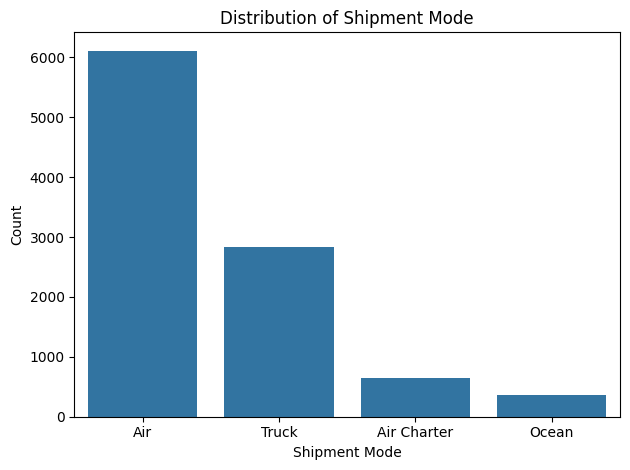

In [ ]:
## visualize which shipment mode is mostly used
sns.barplot(x=shipment_summary.index, y=shipment_summary['Count'])
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.title('Distribution of Shipment Mode')
plt.tight_layout()
plt.show()

### Chart 2 :-Distribution of product group



*   ARV dominates with 82.8% of all shipments, showing its central role in the supply chain. HRDT follows at 16.7%, while ANTM, ACT, and MRDT together form less than 1%, indicating limited distribution.



In [ ]:
data['Product Group'].value_counts()
Product_Group_counts = data['Product Group'].value_counts()
Product_Group_percent = data['Product Group'].value_counts(normalize=True) * 100
Product_Group_summary = pd.DataFrame({
    'Count': Product_Group_counts,
    'Percentage (%)': Product_Group_percent.round(2)
})
print(Product_Group_summary)

               Count  Percentage (%)
Product Group                       
ARV             8550           82.82
HRDT            1728           16.74
ANTM              22            0.21
ACT               16            0.15
MRDT               8            0.08


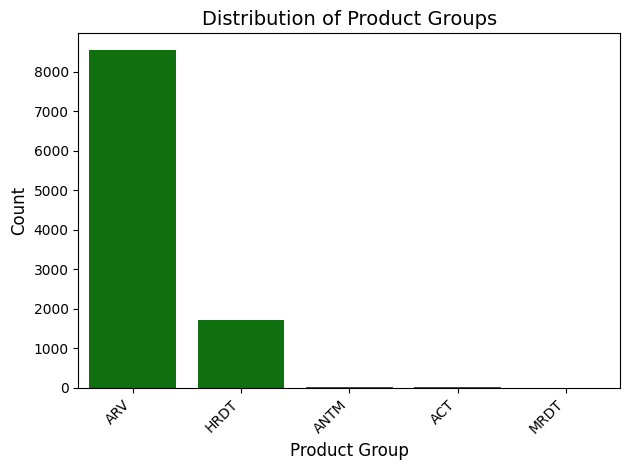

In [ ]:
## visualize Product Group
sns.barplot(
    x=Product_Group_summary.index,
    y=Product_Group_summary['Count'],
    color='green'  # Sets all bars to green
)
plt.xlabel('Product Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Product Groups', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Chart 3 :-Delay Analysis


*   Calculating the positive delay that is actual happened
*   Then calculating the negative delay means the product reach early
*   And there is zero delay also it means there is no delay in the deliveries
*   About 11.49% Late delivery we get, 61 % on time and 27.26% early deliveries
*  after that i visualize the average delay by shipment mode, then which vendors is associated mostly delay and next is the which offices mostly occures with the product delay
*   This insights help us to finding the logistics issue with the shipment mode, with vendors and try to improve this things



In [ ]:
## Calculating the positive delay is the actual delay happened, negatice delay means product reach early, and zero delay means there is no delay in deliveries
total_rows = len(data)
positive_delay = (data['Delay'].dt.days > 0).sum()
negative_delay = (data['Delay'].dt.days < 0).sum()
zero_delay = (data['Delay'].dt.days == 0).sum()
delay_distribution = pd.DataFrame({
    'Type': ['Late Delivery', 'Early Delivery', 'On Time'],
    'Count': [positive_delay, negative_delay, zero_delay],
    'Percentage': [round(positive_delay/total_rows*100, 2),
                   round(negative_delay/total_rows*100, 2),
                   round(zero_delay/total_rows*100, 2)]
})
delay_distribution

,Type,Count,Percentage
0,Late Delivery,1186,11.49
1,Early Delivery,2814,27.26
2,On Time,6324,61.26


/tmp/ipython-input-41-4164611927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Percentage', data=delay_distribution, palette='Set2')


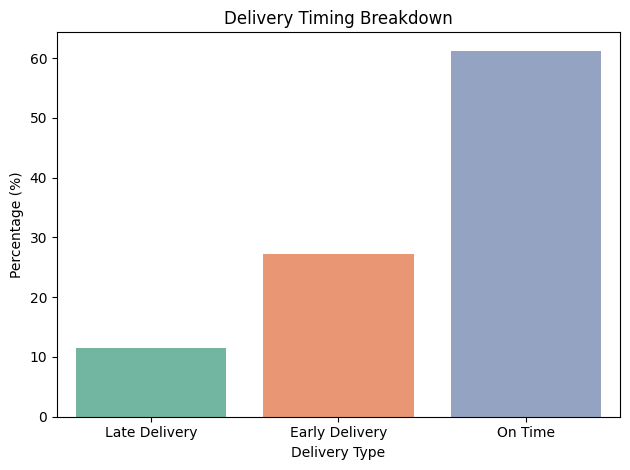

In [ ]:
## visualization of Delay
sns.barplot(x='Type', y='Percentage', data=delay_distribution, palette='Set2')
plt.title('Delivery Timing Breakdown')
plt.ylabel('Percentage (%)')
plt.xlabel('Delivery Type')
plt.tight_layout()
plt.show()

/tmp/ipython-input-42-1215152718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delay_by_mode.values, y=avg_delay_by_mode.index, palette='Blues')


Text(0, 0.5, 'Shipment Mode')

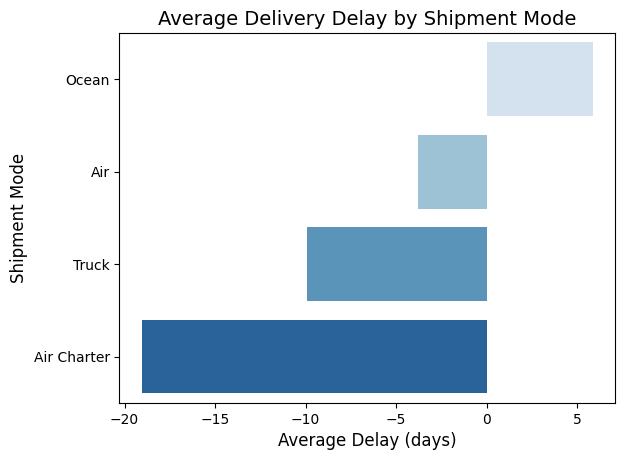

In [ ]:
##  Average Delay by shipment Mode
data['DelayDays'] = data['Delay'].dt.days
avg_delay_by_mode=data.groupby('Shipment Mode')['DelayDays'].mean().sort_values(ascending=False)
sns.barplot(x=avg_delay_by_mode.values, y=avg_delay_by_mode.index, palette='Blues')
plt.title('Average Delivery Delay by Shipment Mode', fontsize=14)
plt.xlabel('Average Delay (days)', fontsize=12)
plt.ylabel('Shipment Mode', fontsize=12)

/tmp/ipython-input-43-246950866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendor_delay_avg.values[:15], y=vendor_delay_avg.index[:15], palette='Reds')


Text(0, 0.5, 'Vendor')

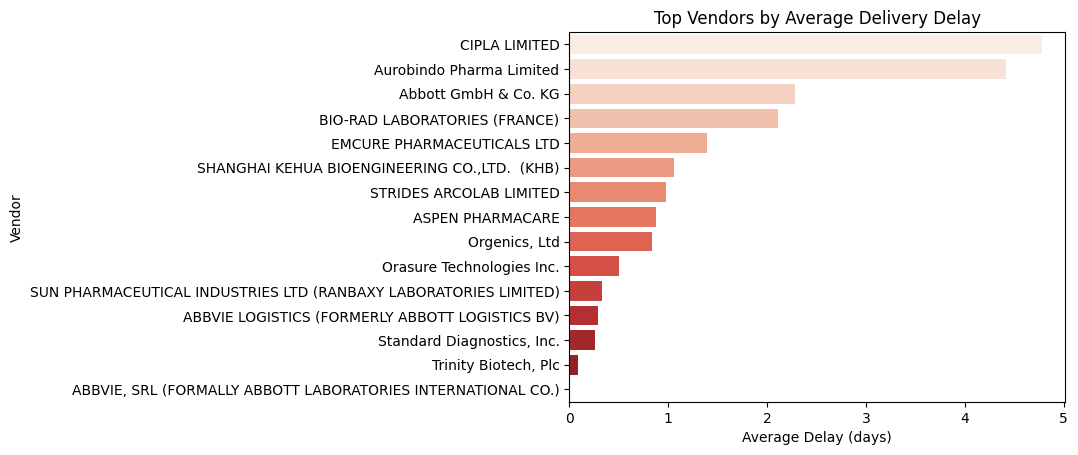

In [ ]:
## Which vendor are consistently late
vendor_delay_avg = data.groupby('Vendor')['DelayDays'].mean().sort_values(ascending=False)
sns.barplot(x=vendor_delay_avg.values[:15], y=vendor_delay_avg.index[:15], palette='Reds')
plt.title('Top Vendors by Average Delivery Delay')
plt.xlabel('Average Delay (days)')
plt.ylabel('Vendor')

/tmp/ipython-input-44-3077834784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


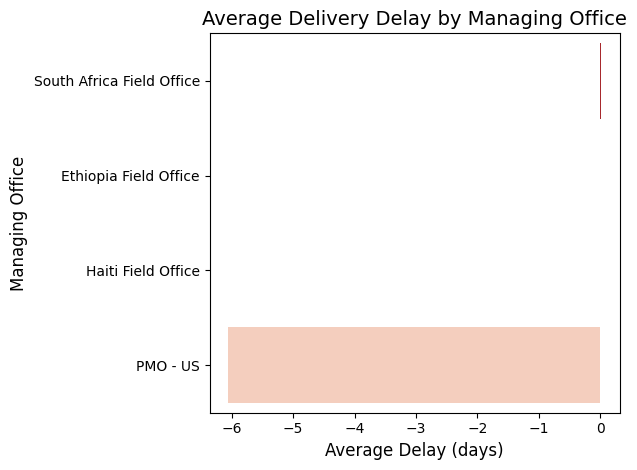

In [ ]:
## We can also  visualize the which office is giving most delay by manage - by column
Manage_delay_avg = data.groupby('Managed By')['DelayDays'].mean().sort_values(ascending=False)
manage_delay_df = Manage_delay_avg.reset_index()
manage_delay_df.columns = ['Managed By', 'Average Delay (days)']
sns.barplot(
    data=manage_delay_df,
    x='Average Delay (days)',
    y='Managed By',
    palette='Reds_r'
)
plt.title('Average Delivery Delay by Managing Office', fontsize=14)
plt.xlabel('Average Delay (days)', fontsize=12)
plt.ylabel('Managing Office', fontsize=12)
plt.tight_layout()
plt.show()

### Chart 4 :-Lead time Analysis

*    Lead time reflects the time between placing an order and receiving the product. This analysis mapped average lead times across four dimensions:

*    Vendor — Identifies suppliers with slow delivery cycles

*    Product Group — Highlights categories prone to extended fulfillment

*    Ship-To Country — Reveals regions with longer delivery durations

*     Managed Office — Points to internal teams responsible for delays

These insights help FedEx streamline supply chain operations by focusing improvement efforts on specific vendors, product groups, regions, and offices.


In [ ]:
## Lead time Day
data['Lead Time Days'] = data['Lead Time'].dt.days
data['Lead Time Days'].dropna().sort_values(ascending=False)
## From 10324 rows valid lead time data is only 3842 and also there is +ve value and -ve value
## -ve value generally not possible w.r.t lead time so filtering pos delay and neg delay
pos_delay = data[data['Lead Time Days'] > 0]
neg_delay = data[data['Lead Time Days'] < 0]
### 3832 rows gor pos delay that is valid
neg_delay
## 5 rows as flag because it have some -ve value in the lead time


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Calculated Unit Price,Unit Price Difference,Freight per Unit,Insurance per Unit,Total Logistics Cost per Unit,Logistics % of Line Item Value,Weight per Unit,Freight Cost per Kilogram,DelayDays,Lead Time Days
3816,33422,108-VN-T30,FPQ-10811,SCMS-164550,ASN-18970,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.140333,0.000333,0.004504,0.000174,0.004677,3.332999,0.002052,2.194997,0,-96.0
4358,42983,104-CI-T30,FPQ-9756,SCMS-147680,ASN-17003,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,0.750000,0.000000,0.062711,0.001051,0.063763,8.501668,0.004153,15.098889,0,-108.0
5686,66431,114-UG-T30,FPQ-4482,SCMS-52570,ASN-5536,Uganda,PMO - US,Direct Drop,FCA,Air,...,0.834633,0.004633,0.055505,0.001800,0.057304,6.865818,0.001553,35.745000,0,-37.0
5753,67600,110-ZM-T30,FPQ-5987,SCMS-77910,ASN-8037,Zambia,PMO - US,Direct Drop,CIP,Air,...,0.309167,-0.000833,0.000823,0.000667,0.001490,0.481883,0.001878,0.438274,0,-224.0
6001,71920,108-VN-T30,FPQ-10811,SCMS-164550,ASN-18970,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.066667,-0.003333,NaN,0.000083,NaN,NaN,NaN,NaN,0,-96.0


/tmp/ipython-input-46-3339463985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendor_lead_time.values[:20], y=vendor_lead_time.index[:20], palette='crest')


Text(0, 0.5, 'Vendor')

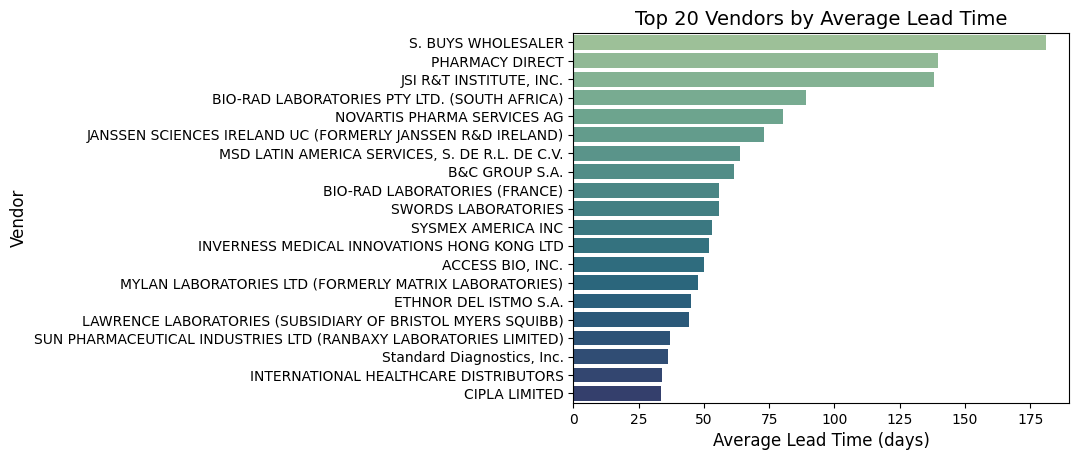

In [ ]:
## Average lead time by vendor
vendor_lead_time = pos_delay.groupby('Vendor')['Lead Time Days'].mean().sort_values(ascending=False)
vendor_lead_time
sns.barplot(x=vendor_lead_time.values[:20], y=vendor_lead_time.index[:20], palette='crest')
plt.title('Top 20 Vendors by Average Lead Time', fontsize=14)
plt.xlabel('Average Lead Time (days)', fontsize=12)
plt.ylabel('Vendor', fontsize=12)

/tmp/ipython-input-47-2800326355.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_lead_time.values, y=product_lead_time.index, palette='crest')


Text(0, 0.5, 'Product Group')

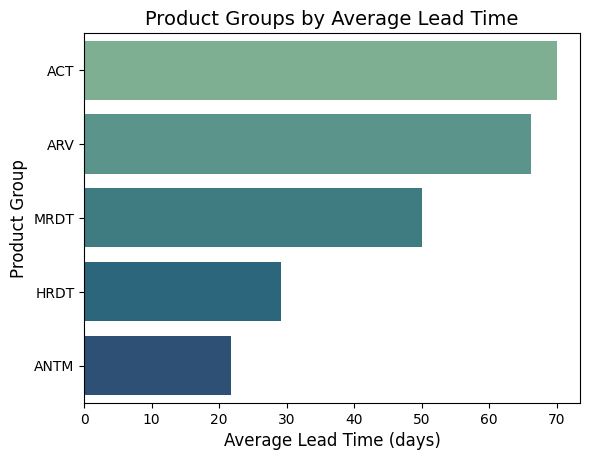

In [ ]:
### Average Lead time by product group
product_lead_time = pos_delay.groupby('Product Group')['Lead Time Days'].mean().sort_values(ascending=False)
product_lead_time
## graphs
sns.barplot(x=product_lead_time.values, y=product_lead_time.index, palette='crest')
plt.title('Product Groups by Average Lead Time', fontsize=14)
plt.xlabel('Average Lead Time (days)', fontsize=12)
plt.ylabel('Product Group', fontsize=12)

Text(0, 0.5, 'Country')

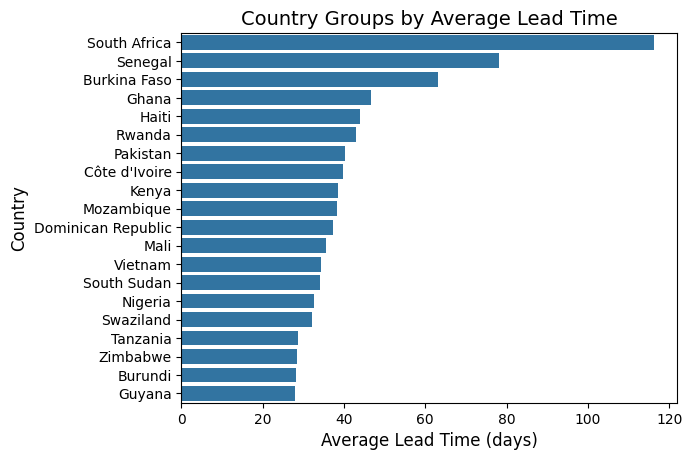

In [ ]:
## Average lead time by country
country_lead_time = pos_delay.groupby('Country')['Lead Time Days'].mean().sort_values(ascending=False)
country_lead_time
## graphs
sns.barplot(x=country_lead_time.values[:20], y=country_lead_time.index[:20])
plt.title('Country Groups by Average Lead Time', fontsize=14)
plt.xlabel('Average Lead Time (days)', fontsize=12)
plt.ylabel('Country', fontsize=12)

/tmp/ipython-input-49-666938062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manage_lead_time.values, y=manage_lead_time.index, palette='bright')


Text(0.5, 0, 'Average Lead Time (days)')

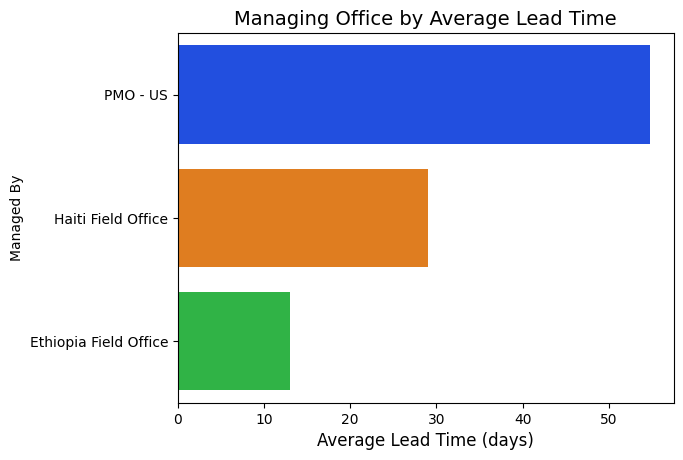

In [ ]:
## Which offices face highest lead time
manage_lead_time = pos_delay.groupby('Managed By')['Lead Time Days'].mean().sort_values(ascending=False)
manage_lead_time
sns.barplot(x=manage_lead_time.values, y=manage_lead_time.index, palette='bright')
plt.title('Managing Office by Average Lead Time', fontsize=14)
plt.xlabel('Average Lead Time (days)', fontsize=12)


In [ ]:
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Calculated Unit Price,Unit Price Difference,Freight per Unit,Insurance per Unit,Total Logistics Cost per Unit,Logistics % of Line Item Value,Weight per Unit,Freight Cost per Kilogram,DelayDays,Lead Time Days
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,0.966667,-0.003333,1.369018,NaN,NaN,NaN,0.022807,60.026154,0,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.025833,-0.004167,0.018840,NaN,NaN,NaN,0.001492,12.629888,0,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,0.800000,0.000000,0.033076,NaN,NaN,NaN,0.003420,9.671228,0,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.066500,-0.003500,0.008358,NaN,NaN,NaN,0.000969,8.629143,0,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,0.053333,0.003333,0.019934,NaN,NaN,NaN,0.003329,5.988153,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,0.060000,0.000000,NaN,0.000071,NaN,NaN,NaN,NaN,-16,NaN
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,0.108667,-0.001333,NaN,0.000128,NaN,NaN,NaN,NaN,6,NaN
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,0.333000,0.003000,NaN,0.000342,NaN,NaN,NaN,NaN,-6,NaN
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,0.108667,-0.001333,NaN,0.000128,NaN,NaN,0.001328,NaN,-36,NaN


In [ ]:
data.dtypes

,0
ID,int64
Project Code,object
PQ #,object
PO / SO #,object
ASN/DN #,object
Country,object
Managed By,object
Fulfill Via,object
Vendor INCO Term,object
Shipment Mode,object


### Chart 5 :-Freight cost analysis



*   This analysis focuses on identifying high-impact freight and logistics cost drivers across shipment methods, vendors, product groups, and countries. By breaking down cost components and physical metrics, we uncovered where logistics expenses are concentrated and why.

Key Explorations:

* Freight Cost by Shipment Mode Revealed which transport methods—e.g. air, truck, sea—incur the highest average cost.

* Freight Cost per Unit by Vendor Flagged vendors that ship products with disproportionately high unit freight charges.

* Freight Cost per Kilogram (Cleaned) Adjusted for rows with zero weight to accurately reflect cost per kilo across modes.

* Weight per Unit by Product Group Identified heavier items that naturally drive higher freight costs.

* Total Logistics Cost per Unit by Vendor Combined freight, insurance, and handling to highlight vendors with overall costly logistics.

* Shipment Volume by Product Group Showed which categories dominate the quantity of goods shipped.

* Line Item Value by Product Group & Country Illustrated where procurement spending is concentrated—across product types and regions.

Business Impact:

FedEx can use these insights to:

* Target vendor renegotiations where logistics costs are high

* Optimize shipment mode selection based on weight-efficiency

* Refine procurement strategies around product groups and geographies with costly patterns

* Pinpoint freight inefficiencies tied to packaging or product design




/tmp/ipython-input-52-61673711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freight_by_mode.values, y=freight_by_mode.index, palette='YlGnBu')


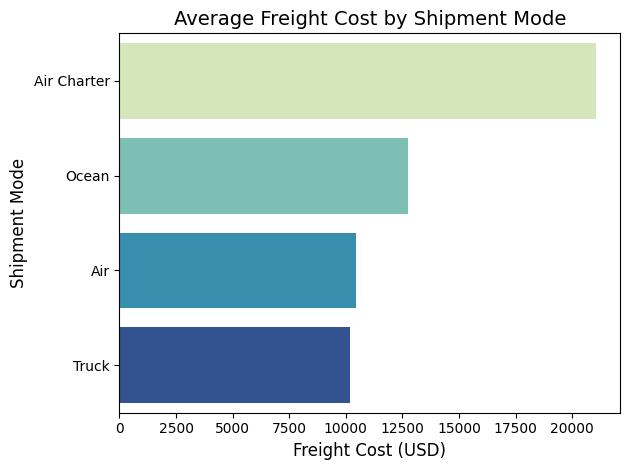

In [ ]:
##Friehgt cost by shipment mode
freight_by_mode = data.groupby('Shipment Mode')['Freight Cost (USD)'].mean().sort_values(ascending=False)
sns.barplot(x=freight_by_mode.values, y=freight_by_mode.index, palette='YlGnBu')
plt.title('Average Freight Cost by Shipment Mode', fontsize=14)
plt.xlabel('Freight Cost (USD)', fontsize=12)
plt.ylabel('Shipment Mode', fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-53-7099892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freight_per_unit_vendor.values[:15], y=freight_per_unit_vendor.index[:15], palette='Oranges')


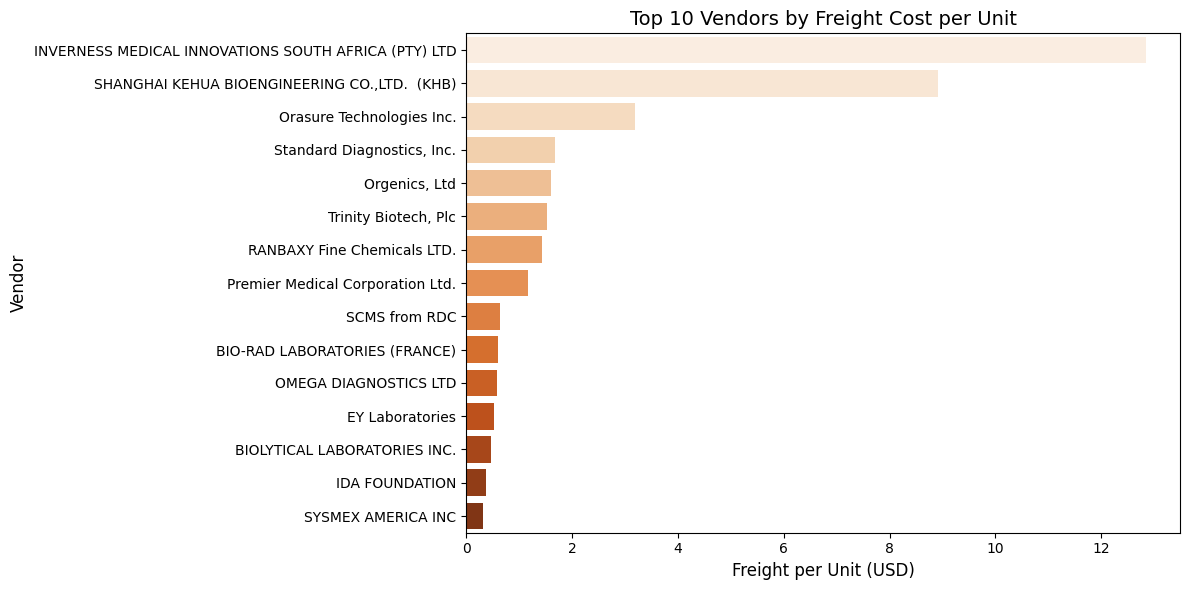

In [ ]:
# Group and calculate average freight per unit
freight_per_unit_vendor = data.groupby('Vendor')['Freight per Unit'].mean().sort_values(ascending=False)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=freight_per_unit_vendor.values[:15], y=freight_per_unit_vendor.index[:15], palette='Oranges')
plt.title('Top 10 Vendors by Freight Cost per Unit', fontsize=14)
plt.xlabel('Freight per Unit (USD)', fontsize=12)
plt.ylabel('Vendor', fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-54-3819773317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Freight per Kg'] = clean_data['Freight Cost (USD)'] / clean_data['Weight (Kilograms)']
/tmp/ipython-input-54-3819773317.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freight_per_kg_mode.values, y=freight_per_kg_mode.index, palette='Purples')


Text(0, 0.5, 'Shipment Mode')

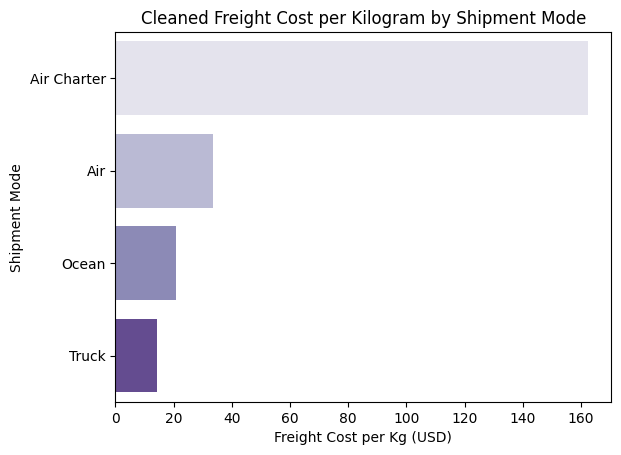

In [ ]:
## Freight cost per kilogram
freight_per_kg_mode = data.groupby('Shipment Mode')['Freight Cost per Kilogram'].mean().sort_values(ascending=False)
freight_per_kg_mode
clean_data = data[data['Weight (Kilograms)'] > 0]
clean_data['Freight per Kg'] = clean_data['Freight Cost (USD)'] / clean_data['Weight (Kilograms)']
freight_per_kg_mode = clean_data.groupby('Shipment Mode')['Freight per Kg'].mean().sort_values(ascending=False)
sns.barplot(x=freight_per_kg_mode.values, y=freight_per_kg_mode.index, palette='Purples')
plt.title('Cleaned Freight Cost per Kilogram by Shipment Mode')
plt.xlabel('Freight Cost per Kg (USD)')
plt.ylabel('Shipment Mode')

/tmp/ipython-input-55-3806526854.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logistics_percent_product.values, y=logistics_percent_product.index, palette='ch:s=.25,rot=-.25')


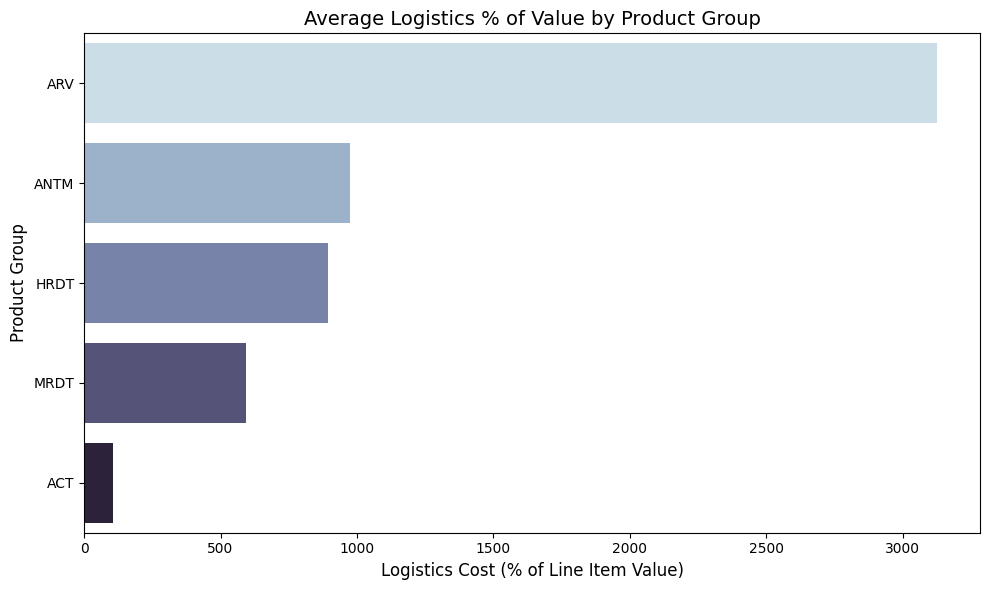

In [ ]:
## Logistics cost % of line item value by product group
##This reveals how much of the total product value goes into logistics (freight + insurance)
# Group and sort
logistics_percent_product = data.groupby('Product Group')['Logistics % of Line Item Value'].mean().sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=logistics_percent_product.values, y=logistics_percent_product.index, palette='ch:s=.25,rot=-.25')
plt.title('Average Logistics % of Value by Product Group', fontsize=14)
plt.xlabel('Logistics Cost (% of Line Item Value)', fontsize=12)
plt.ylabel('Product Group', fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-56-715451317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weight_by_product.values, y=weight_by_product.index, palette='rocket')


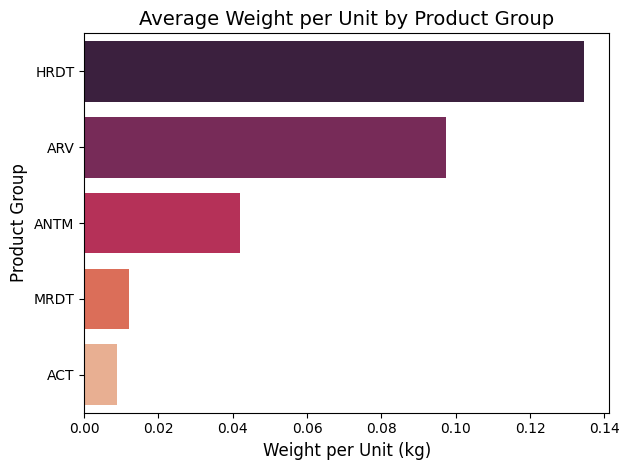

In [ ]:
## Weight per unit
## helps to indetify heavier item that give higher shipping cost
weight_by_product = data.groupby('Product Group')['Weight per Unit'].mean().sort_values(ascending=False)
sns.barplot(x=weight_by_product.values, y=weight_by_product.index, palette='rocket')
plt.title('Average Weight per Unit by Product Group', fontsize=14)
plt.xlabel('Weight per Unit (kg)', fontsize=12)
plt.ylabel('Product Group', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-57-1673644485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logistics_cost_vendor.values[:20], y=logistics_cost_vendor.index[:20], palette='icefire')


Text(0, 0.5, 'Vendor')

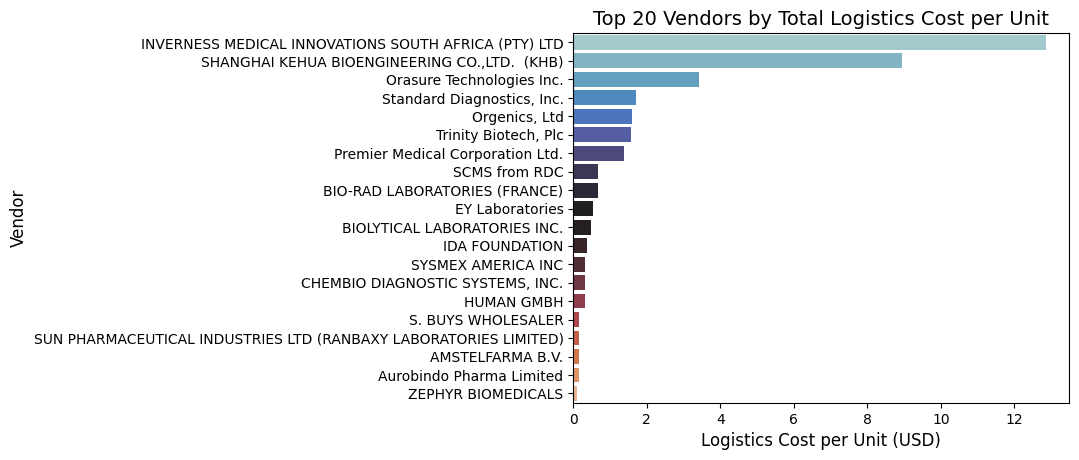

In [ ]:
## total logistics cost per unit by vendor
logistics_cost_vendor = data.groupby('Vendor')['Total Logistics Cost per Unit'].mean().sort_values(ascending=False)
sns.barplot(x=logistics_cost_vendor.values[:20], y=logistics_cost_vendor.index[:20], palette='icefire')
plt.title('Top 20 Vendors by Total Logistics Cost per Unit', fontsize=14)
plt.xlabel('Logistics Cost per Unit (USD)', fontsize=12)
plt.ylabel('Vendor', fontsize=12)

/tmp/ipython-input-58-3968820807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_units_product.values, y=total_units_product.index, palette='rocket')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

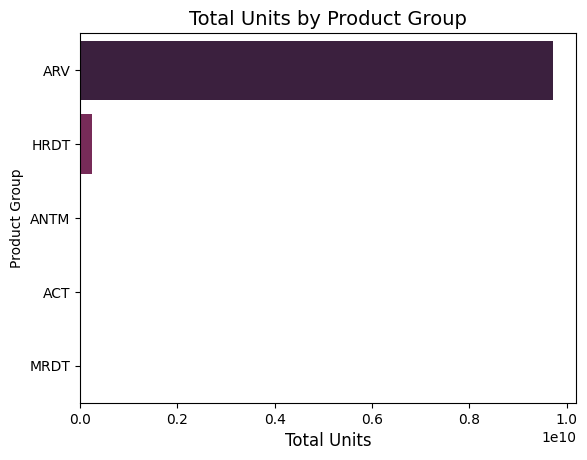

In [ ]:
## Total units by product group
## which product group dominates shipment volume
total_units_product = data.groupby('Product Group')['Total Units'].sum().sort_values(ascending=False)
sns.barplot(x=total_units_product.values, y=total_units_product.index, palette='rocket')
plt.title('Total Units by Product Group', fontsize=14)
plt.xlabel('Total Units', fontsize=12)
plt

/tmp/ipython-input-59-3335340066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_by_product.values, y=value_by_product.index, palette='mako')


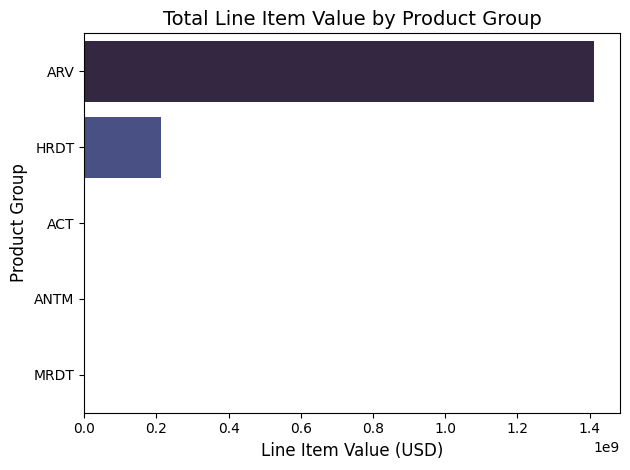

In [ ]:
## Line item value by product group
value_by_product = data.groupby('Product Group')['Line Item Value'].sum().sort_values(ascending=False)

sns.barplot(x=value_by_product.values, y=value_by_product.index, palette='mako')
plt.title('Total Line Item Value by Product Group', fontsize=14)
plt.xlabel('Line Item Value (USD)', fontsize=12)
plt.ylabel('Product Group', fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-60-1084712303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_by_country.values[:20], y=value_by_country.index[:20], palette='crest')


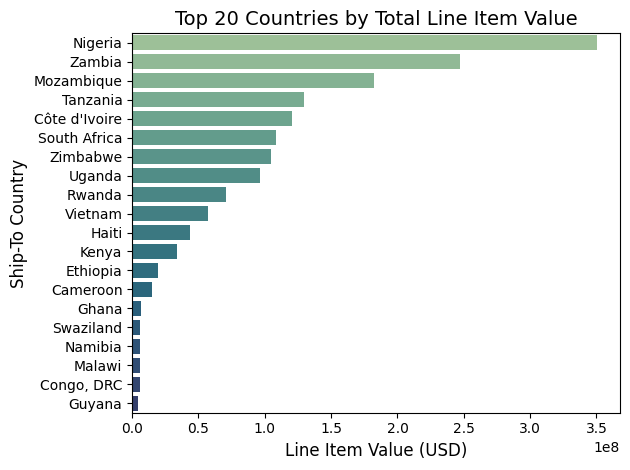

In [ ]:
## Total value ship to country
value_by_country = data.groupby('Country')['Line Item Value'].sum().sort_values(ascending=False)
sns.barplot(x=value_by_country.values[:20], y=value_by_country.index[:20], palette='crest')
plt.title('Top 20 Countries by Total Line Item Value', fontsize=14)
plt.xlabel('Line Item Value (USD)', fontsize=12)
plt.ylabel('Ship-To Country', fontsize=12)
plt.tight_layout()

### Chart 6 :-Analysis related to the Manufacturing site

*This analysis focuses on evaluating performance and cost indicators across
manufacturing locations to identify operational inefficiencies and financial risk factors.

Key Explorations:

* Average Lead Time by Site Highlights factories with slower fulfillment cycles, helping pinpoint potential bottlenecks.

* Shipment Volume by Site Reveals high-output facilities that handle the bulk of logistics operations.

* Freight Cost per Unit by Site Identifies production locations where transportation costs are disproportionately high.

* Average Delivery Delay by Site Flags facilities consistently missing delivery timelines—useful for performance audits.

* Freight vs Insurance Cost (by Site and Vendor) Compares major cost components to understand where insurance overhead or freight expenses dominate. This helps isolate costly shipping or high-value inventory patterns.

Business Impact:

FedEx can leverage these insights to:

* Reallocate orders to more efficient manufacturing hubs

* Reduce freight spend by targeting packaging or location-based inefficiencies

* Investigate delivery reliability issues at underperforming sites

* Fine-tune vendor relationships based on production cost profiles

/tmp/ipython-input-61-3713669453.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lead_time_by_site.values[:20], y=lead_time_by_site.index[:20], palette='magma')


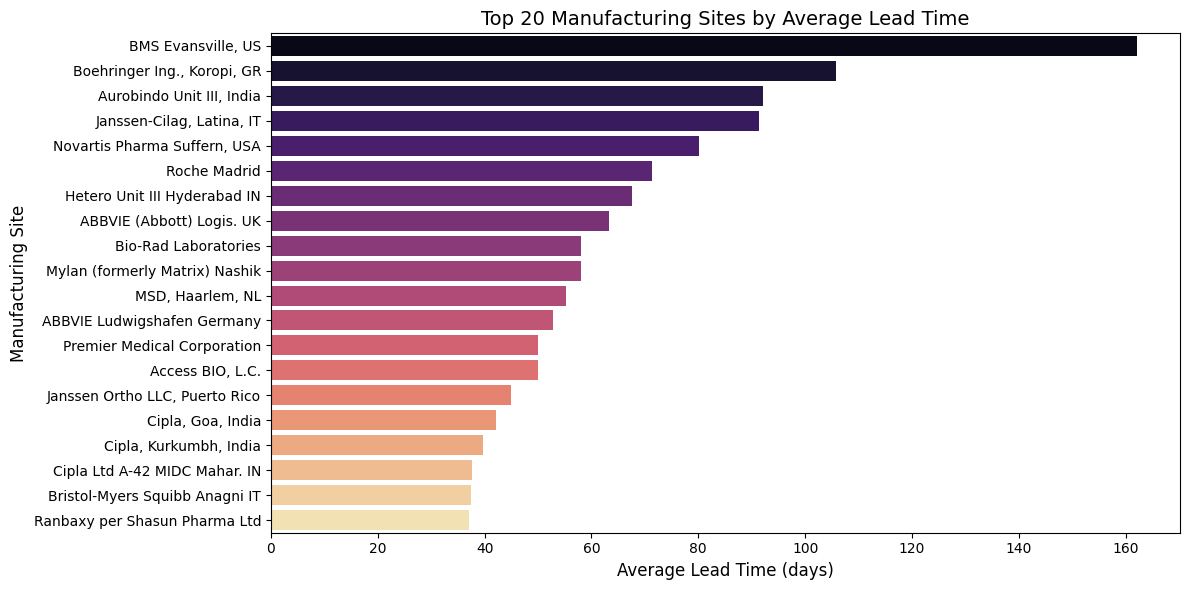

In [ ]:
## avg lead time by manufacturing site
lead_time_clean = data[data['Lead Time Days'] > 0]

lead_time_by_site = lead_time_clean.groupby('Manufacturing Site')['Lead Time Days'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=lead_time_by_site.values[:20], y=lead_time_by_site.index[:20], palette='magma')
plt.title('Top 20 Manufacturing Sites by Average Lead Time', fontsize=14)
plt.xlabel('Average Lead Time (days)', fontsize=12)
plt.ylabel('Manufacturing Site', fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-62-3006916927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=units_by_site.values[:20], y=units_by_site.index[:20], palette='plasma')


Text(0, 0.5, 'Manufacturing Site')

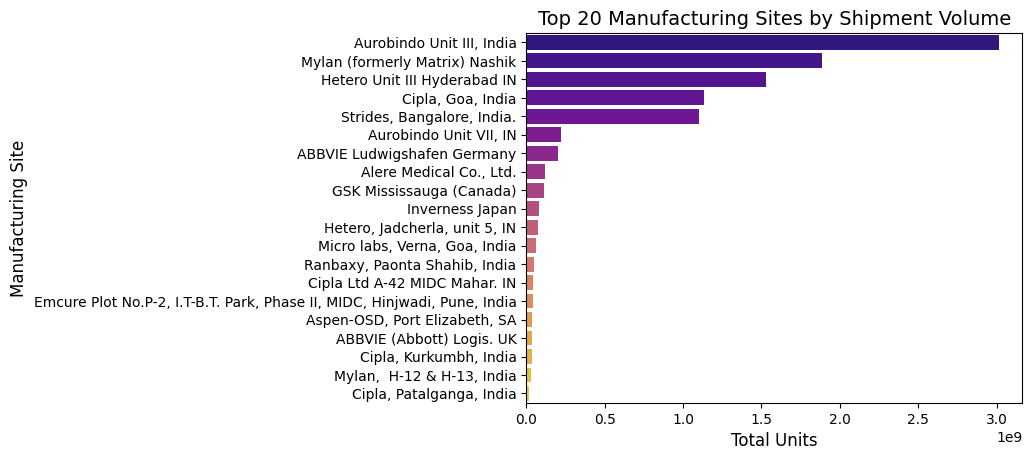

In [ ]:
## total shipment by manufacturing site
units_by_site = data.groupby('Manufacturing Site')['Total Units'].sum().sort_values(ascending=False)
sns.barplot(x=units_by_site.values[:20], y=units_by_site.index[:20], palette='plasma')
plt.title('Top 20 Manufacturing Sites by Shipment Volume', fontsize=14)
plt.xlabel('Total Units', fontsize=12)
plt.ylabel('Manufacturing Site', fontsize=12)


/tmp/ipython-input-63-2792233883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freight_unit_by_site.values[:20], y=freight_unit_by_site.index[:20], palette='inferno')


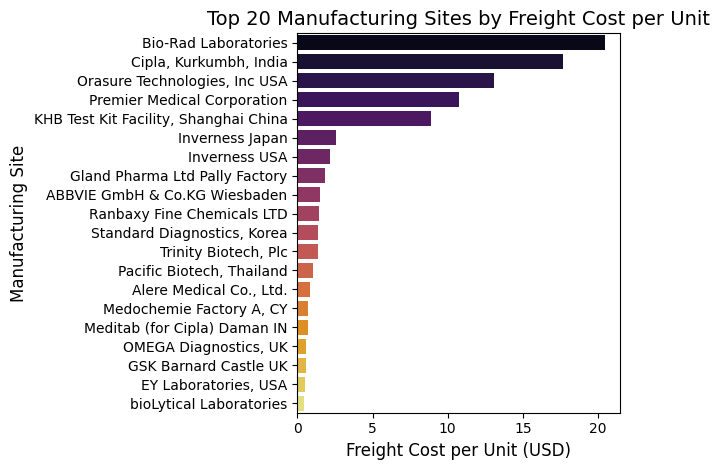

In [ ]:
## avg freight cost per unit by manufacturing site
freight_unit_by_site = data.groupby('Manufacturing Site')['Freight per Unit'].mean().sort_values(ascending=False)
sns.barplot(x=freight_unit_by_site.values[:20], y=freight_unit_by_site.index[:20], palette='inferno')
plt.title('Top 20 Manufacturing Sites by Freight Cost per Unit', fontsize=14)
plt.xlabel('Freight Cost per Unit (USD)', fontsize=12)
plt.ylabel('Manufacturing Site', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-64-223470155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delay_site.values[:7], y=avg_delay_site.index[:7], palette='Reds')


Text(0, 0.5, 'Manufacturing Site')

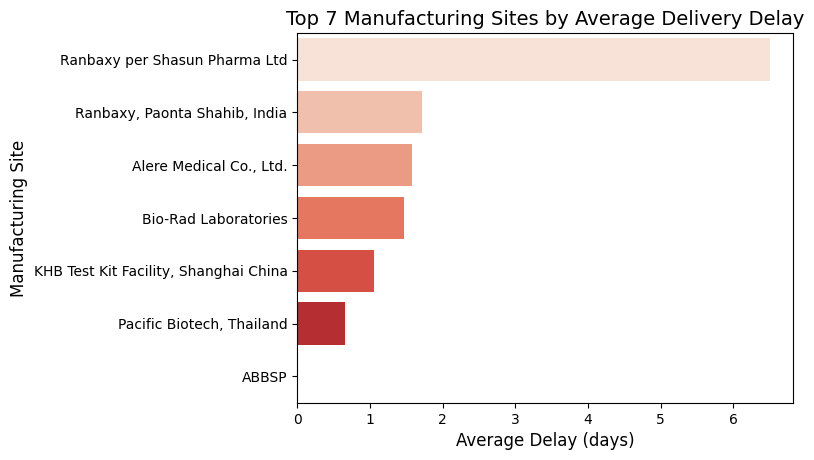

In [ ]:
## delay days by manufacturing site
## only takes delay days
delay_by_site = data[data['DelayDays'].notnull()]
avg_delay_site = delay_by_site.groupby('Manufacturing Site')['DelayDays'].mean().sort_values(ascending=False)
sns.barplot(x=avg_delay_site.values[:7], y=avg_delay_site.index[:7], palette='Reds')
plt.title('Top 7 Manufacturing Sites by Average Delivery Delay', fontsize=14)
plt.xlabel('Average Delay (days)', fontsize=12)
plt.ylabel('Manufacturing Site', fontsize=12)

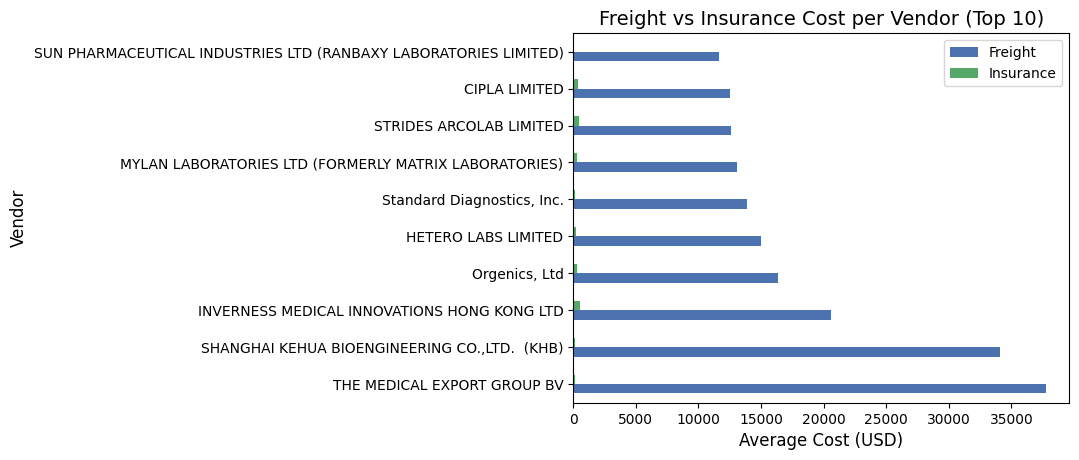

In [ ]:
##Freight cost vs insurance group by vendor
cost_breakdown_vendor = data.groupby('Vendor')[['Freight Cost (USD)', 'Line Item Insurance (USD)']].mean().sort_values(by='Freight Cost (USD)', ascending=False)
cost_breakdown_vendor.head(10).plot(kind='barh',stacked=False, color=['#4C72B0', '#55A868'])
plt.title('Freight vs Insurance Cost per Vendor (Top 10)', fontsize=14)
plt.xlabel('Average Cost (USD)', fontsize=12)
plt.ylabel('Vendor', fontsize=12)
plt.legend(['Freight', 'Insurance'])
plt.show()

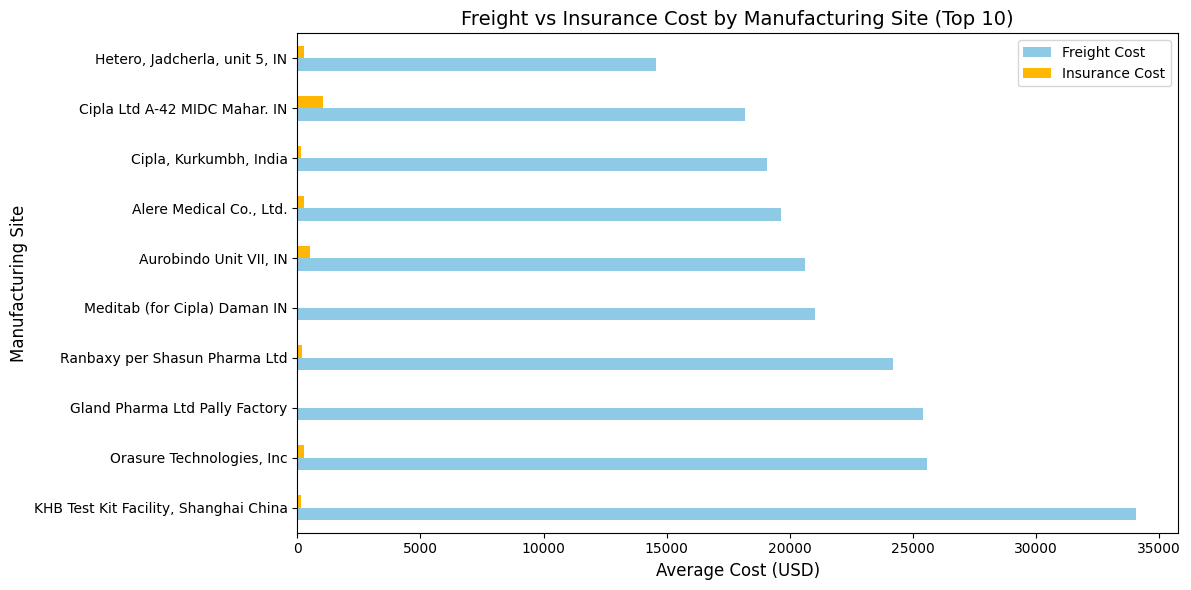

In [ ]:
## Freight vs insurance by manufacturing site
cost_by_site = data.groupby('Manufacturing Site')[['Freight Cost (USD)', 'Line Item Insurance (USD)']].mean().sort_values(by='Freight Cost (USD)', ascending=False)
cost_by_site.head(10).plot(kind='barh', figsize=(12, 6), stacked=False, color=['#8ecae6', '#ffb703'])
plt.title('Freight vs Insurance Cost by Manufacturing Site (Top 10)', fontsize=14)
plt.xlabel('Average Cost (USD)', fontsize=12)
plt.ylabel('Manufacturing Site', fontsize=12)
plt.legend(['Freight Cost', 'Insurance Cost'])
plt.tight_layout()
plt.show()